In [1]:
# Eric's Attempt at Consolidating our information for Presentation use

In [2]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import panel as pn
import plotly_express as px
from pathlib import Path
from panel.interact import interact

%matplotlib inline
pn.extension('plotly')

import seaborn as sns
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib


In [3]:
# Import the CSVs to Pandas DataFrames
full_dataset = pd.read_csv(Path('../data/cleandata/join_data.csv'))

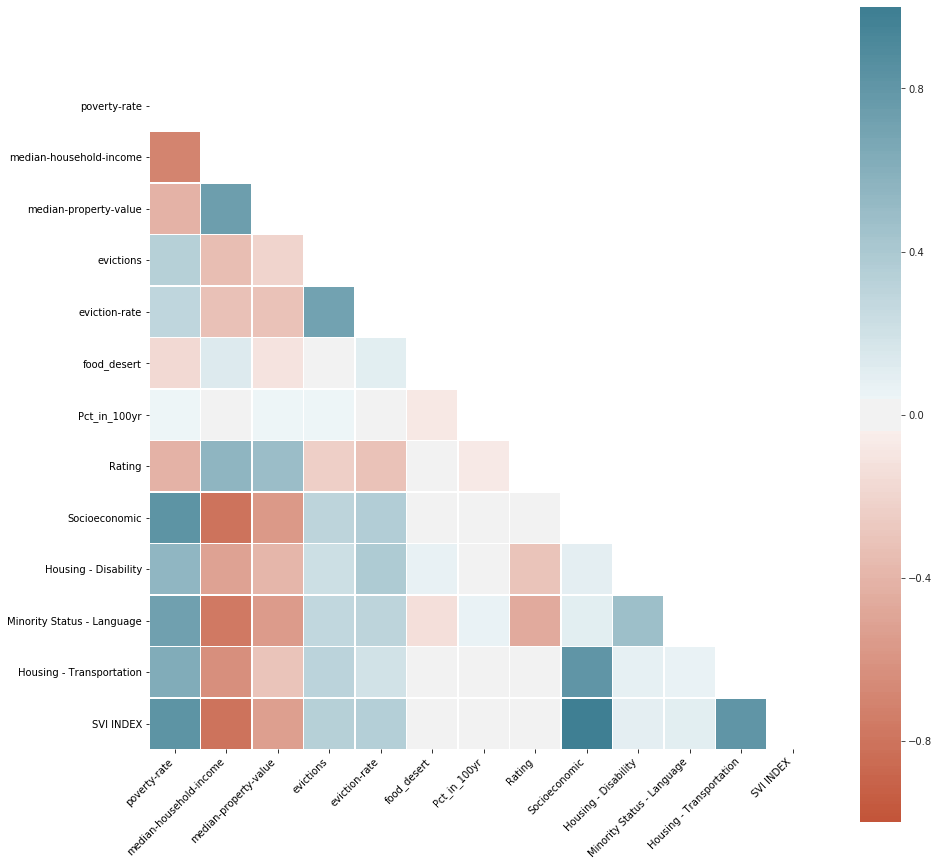

In [4]:
correlation2 = full_dataset.drop(columns = ['year','Zip', 'FIPS', 'population']).corr() #mask was silenced since it was ruinined somehow... filling NA's did not do much to change the head map

mask2 = np.zeros_like(correlation2)
mask2[np.triu_indices_from(mask2)] = True

fig, ax2 = plt.subplots(figsize=(15,15))

with sns.axes_style("white"):
    ax2 = sns.heatmap(
        correlation2, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        annot = False,
        linewidths=.5,
        mask=mask2
    )

    ax2.set_xticklabels(
        ax2.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

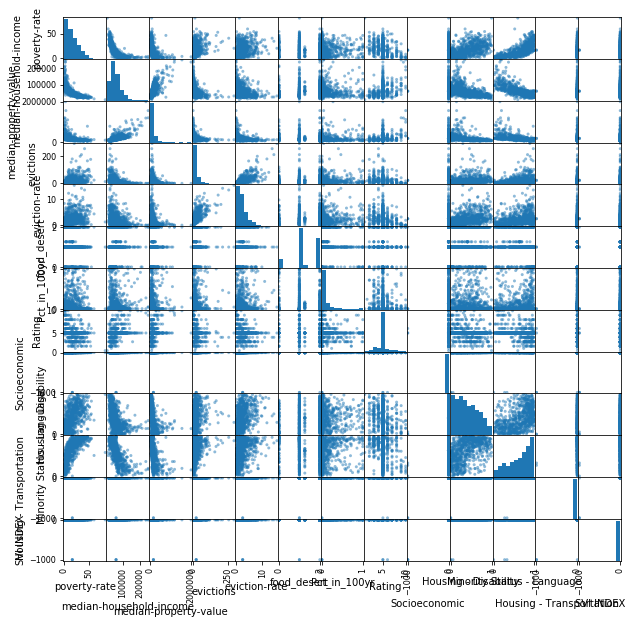

In [17]:
df = full_dataset.drop(columns = ['year','Zip', 'FIPS', 'population'])
plot = scatter_matrix(df, figsize=(10,10))
plt.show()

In [15]:
df = full_dataset.drop(columns = ['year','Zip', 'FIPS', 'population']) #More Interactivity
fig = px.scatter_matrix(df, title ='What is going on?')
fig.update_traces(diagonal_visible=False)
fig.show()

In [37]:
def scatter_plot_vs_poverty(DataFrame_Attribute):
    
    copy_full_df = full_dataset
    
    for column in copy_full_df.columns.to_list():
        df = copy_full_df
        df[column].fillna((df[column].mean()), inplace = True)
    
    # return df.hv('poverty-rate', attribute_one, title = f'Harris County: {attribute_one} vs Poverty Rate, 2016', kind='scatter')
    return px.scatter(df, x = DataFrame_Attribute, y = 'poverty-rate', size = 'population', title = f"{DataFrame_Attribute} VS Poverty Rate by Population Size")

interact(scatter_plot_vs_poverty, DataFrame_Attribute = full_dataset.drop(columns = ['FIPS','year','Zip']).columns, )

Column
    [0] Column
        [0] Select(name='DataFrame_Attribute', options=['population', ...], value='population')
    [1] Row
        [0] Plotly(Figure, name='interactive01908')

SyntaxError: invalid syntax (<ipython-input-34-bd45b9aa6590>, line 1)

In [32]:
# Define Panel Visualization Functions

cols = list(full_dataset.columns)
cols2 = full_dataset.drop(columns = ['FIPS', 'Zip', 'year']).columns

Po = pn.widgets.IntSlider(name='Poverty Rate', start=0, end=100, value=1)
P = pn.widgets.IntSlider(name='Property Value', start=0, end=100, value=1)
S = pn.widgets.IntSlider(name='SVI', start=0, end=100, value=1)
F = pn.widgets.IntSlider(name='Food Desert', start=0, end=100, value=1)
R = pn.widgets.IntSlider(name='School Ratings', start=0, end=100, value=1)
attribute_one = pn.widgets.Select(name='x', options=list(cols2))

@pn.depends(Po.param.value, P.param.value, S.param.value, F.param.value, R.param.value, attribute_one.param.value)
def Rent_Risk_Index(Po, P, S, F, R, attribute_one):
    
    def calc_RRI (df, Po, P, S, F, R):

        RRI = (Po*(10 - df['poverty-rate']) + S*(10 - df['SVI INDEX']) + F*(10 - df['food_desert']) + P*df['median-household-income'] + R*df['Rating'])/(Po+S+F+P+R)

        return RRI
    
    df = full_dataset.drop(columns=('FIPS')).rank(pct=True) * 10

    df['RRI'] = df.apply(lambda x: calc_RRI(x, Po, P, S, F, R), axis = 1)
    
    df['FIPS'] = full_dataset['FIPS']
    
#    output_path = Path("../data/cleandata/RRI.csv")
    
#     with open(output_path, 'w') as file:
#         file.write(df[['FIPS', 'RRI']].to_csv())
        
    return df.hvplot('RRI', attribute_one, title = f'RRI vs {attribute_one}', kind='scatter', figsize = (15,15))

    
pn.Column('# RRI V.S. DataFrame Attributes',
              pn.Row(pn.WidgetBox(Rent_Risk_Index, Po, P, S, F, R, attribute_one)))

Column
    [0] Markdown(str)
    [1] Row
        [0] WidgetBox(css_classes=['widget-box'])
            [0] ParamFunction(function)
            [1] IntSlider(end=100, name='Poverty Rate', value=1)
            [2] IntSlider(end=100, name='Property Value', value=1)
            [3] IntSlider(end=100, name='SVI', value=1)
            [4] IntSlider(end=100, name='Food Desert', value=1)
            [5] IntSlider(end=100, name='School Ratings', value=1)
            [6] Select(name='x', options=['population', ...], value='population')

In [31]:
cols = list(full_dataset.columns)
cols2 = full_dataset.drop(columns = ['FIPS', 'Zip', 'year']).columns

Po = pn.widgets.IntSlider(name='Poverty Rate', start=0, end=100, value=1)
P = pn.widgets.IntSlider(name='Property Value', start=0, end=100, value=1)
S = pn.widgets.IntSlider(name='SVI', start=0, end=100, value=1)
F = pn.widgets.IntSlider(name='Food Desert', start=0, end=100, value=1)
R = pn.widgets.IntSlider(name='School Ratings', start=0, end=100, value=1)
# attribute_one = pn.widgets.Select(name='x', options=list(cols2))

@pn.depends(Po.param.value, P.param.value, S.param.value, F.param.value, R.param.value)
def Rent_Risk_Index(Po, P, S, F, R):
    
    def calc_RRI (df, Po, P, S, F, R):

        RRI = (Po*(10 - df['poverty-rate']) + S*(10 - df['SVI INDEX']) + F*(10 - df['food_desert']) + P*df['median-household-income'] + R*df['Rating'])/(Po+S+F+P+R)

        return RRI
    
    df = full_dataset.drop(columns=('FIPS')).rank(pct=True) * 10

    df['RRI'] = df.apply(lambda x: calc_RRI(x, Po, P, S, F, R), axis = 1)
    
    df['FIPS'] = full_dataset['FIPS']
    
#    output_path = Path("../data/cleandata/RRI.csv")
    
#     with open(output_path, 'w') as file:
#         file.write(df[['FIPS', 'RRI']].to_csv())
        
    return df[['RRI','FIPS']].head()

    
pn.Column('# RRI First 5 Rows V.S. DataFrame Attributes',
              pn.Row(pn.WidgetBox(Rent_Risk_Index, Po, P, S, F, R)))

Column
    [0] Markdown(str)
    [1] Row
        [0] WidgetBox(css_classes=['widget-box'])
            [0] ParamFunction(function)
            [1] IntSlider(end=100, name='Poverty Rate', value=1)
            [2] IntSlider(end=100, name='Property Value', value=1)
            [3] IntSlider(end=100, name='SVI', value=1)
            [4] IntSlider(end=100, name='Food Desert', value=1)
            [5] IntSlider(end=100, name='School Ratings', value=1)